In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\uma\Downloads\Dataset .csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,French,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,Seafood,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,Japanese,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,Japanese,4,4.8,Dark Green,Excellent,229


In [3]:
restaurant_chains = df.groupby("Restaurant Name").size().reset_index(name="Chain Count")
restaurant_chains = restaurant_chains[restaurant_chains["Chain Count"] > 1]

In [4]:
restaurant_chains = restaurant_chains.sort_values(by="Chain Count", ascending=False)

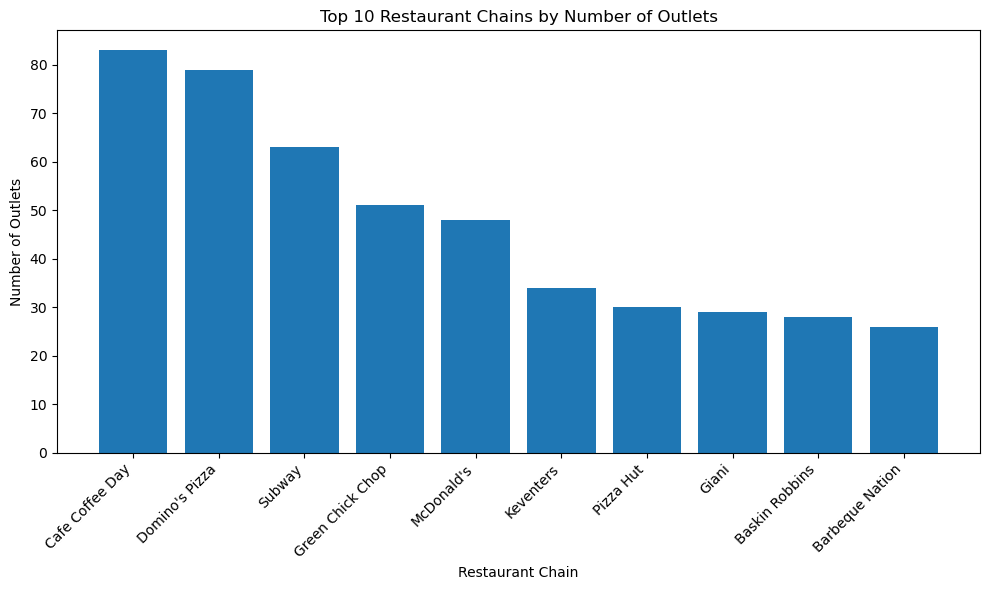

In [5]:
plt.figure(figsize=(10, 6))
plt.bar(restaurant_chains["Restaurant Name"][:10], restaurant_chains["Chain Count"][:10])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Restaurant Chain")
plt.ylabel("Number of Outlets")
plt.title("Top 10 Restaurant Chains by Number of Outlets")
plt.tight_layout()
plt.show()

In [7]:

chain_ratings = df.groupby("Restaurant Name")["Aggregate rating"].mean().reset_index(name="Average Rating")
chain_votes = df.groupby("Restaurant Name")["Votes"].sum().reset_index(name="Total Votes")

In [8]:
chain_analysis = pd.merge(chain_ratings, chain_votes, on="Restaurant Name")

In [9]:
chain_analysis = chain_analysis.sort_values(by="Average Rating", ascending=False)

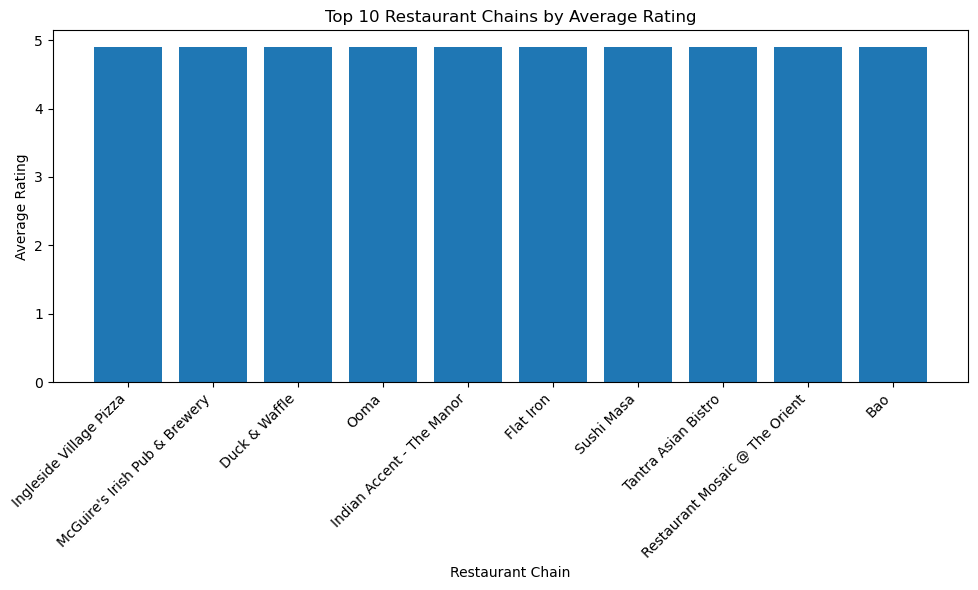

In [10]:
plt.figure(figsize=(10, 6))
plt.bar(chain_analysis["Restaurant Name"][:10], chain_analysis["Average Rating"][:10])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Restaurant Chain")
plt.ylabel("Average Rating")
plt.title("Top 10 Restaurant Chains by Average Rating")
plt.tight_layout()
plt.show()

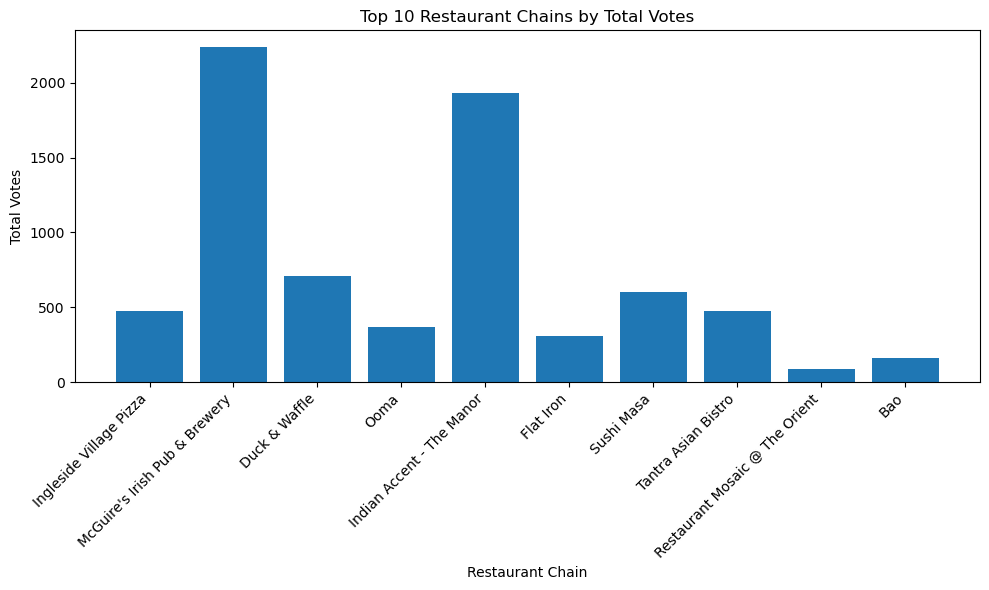

In [11]:
plt.figure(figsize=(10, 6))
plt.bar(chain_analysis["Restaurant Name"][:10], chain_analysis["Total Votes"][:10])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Restaurant Chain")
plt.ylabel("Total Votes")
plt.title("Top 10 Restaurant Chains by Total Votes")
plt.tight_layout()
plt.show()

In [12]:
print("Top 10 Restaurant Chains by Number of Outlets:")
print(restaurant_chains[["Restaurant Name", "Chain Count"]].head(10))

Top 10 Restaurant Chains by Number of Outlets:
       Restaurant Name  Chain Count
1113   Cafe Coffee Day           83
2101    Domino's Pizza           79
6107            Subway           63
2717  Green Chick Chop           51
4078        McDonald's           48
3479         Keventers           34
4964         Pizza Hut           30
2620             Giani           29
681     Baskin Robbins           28
664    Barbeque Nation           26


In [13]:
print("\nTop 10 Restaurant Chains by Total Votes:")
print(chain_analysis[["Restaurant Name", "Total Votes"]].head(10))


Top 10 Restaurant Chains by Total Votes:
                     Restaurant Name  Total Votes
3146         Ingleside Village Pizza          478
4079   McGuire's Irish Pub & Brewery         2238
2136                   Duck & Waffle          706
4708                            Ooma          365
3116       Indian Accent - The Manor         1934
2355                       Flat Iron          309
6172                      Sushi Masa          605
6305             Tantra Asian Bistro          474
5323  Restaurant Mosaic @ The Orient           85
652                              Bao          161
